# Neural Network with Scikit-Learn
* Due Date: July 18, 2018
* by: Jose Medina

### Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


### Read the Digit Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

#load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

### Some info from the data

In [3]:
# Print the number of 8 by 8 images
print("Data Size" , digits.data.shape)
# Print the number of labels
print("Number of Labels (1797,):", digits.target.shape)


Data Size (1797, 64)
Number of Labels (1797,): (1797,)


### Plot images of data

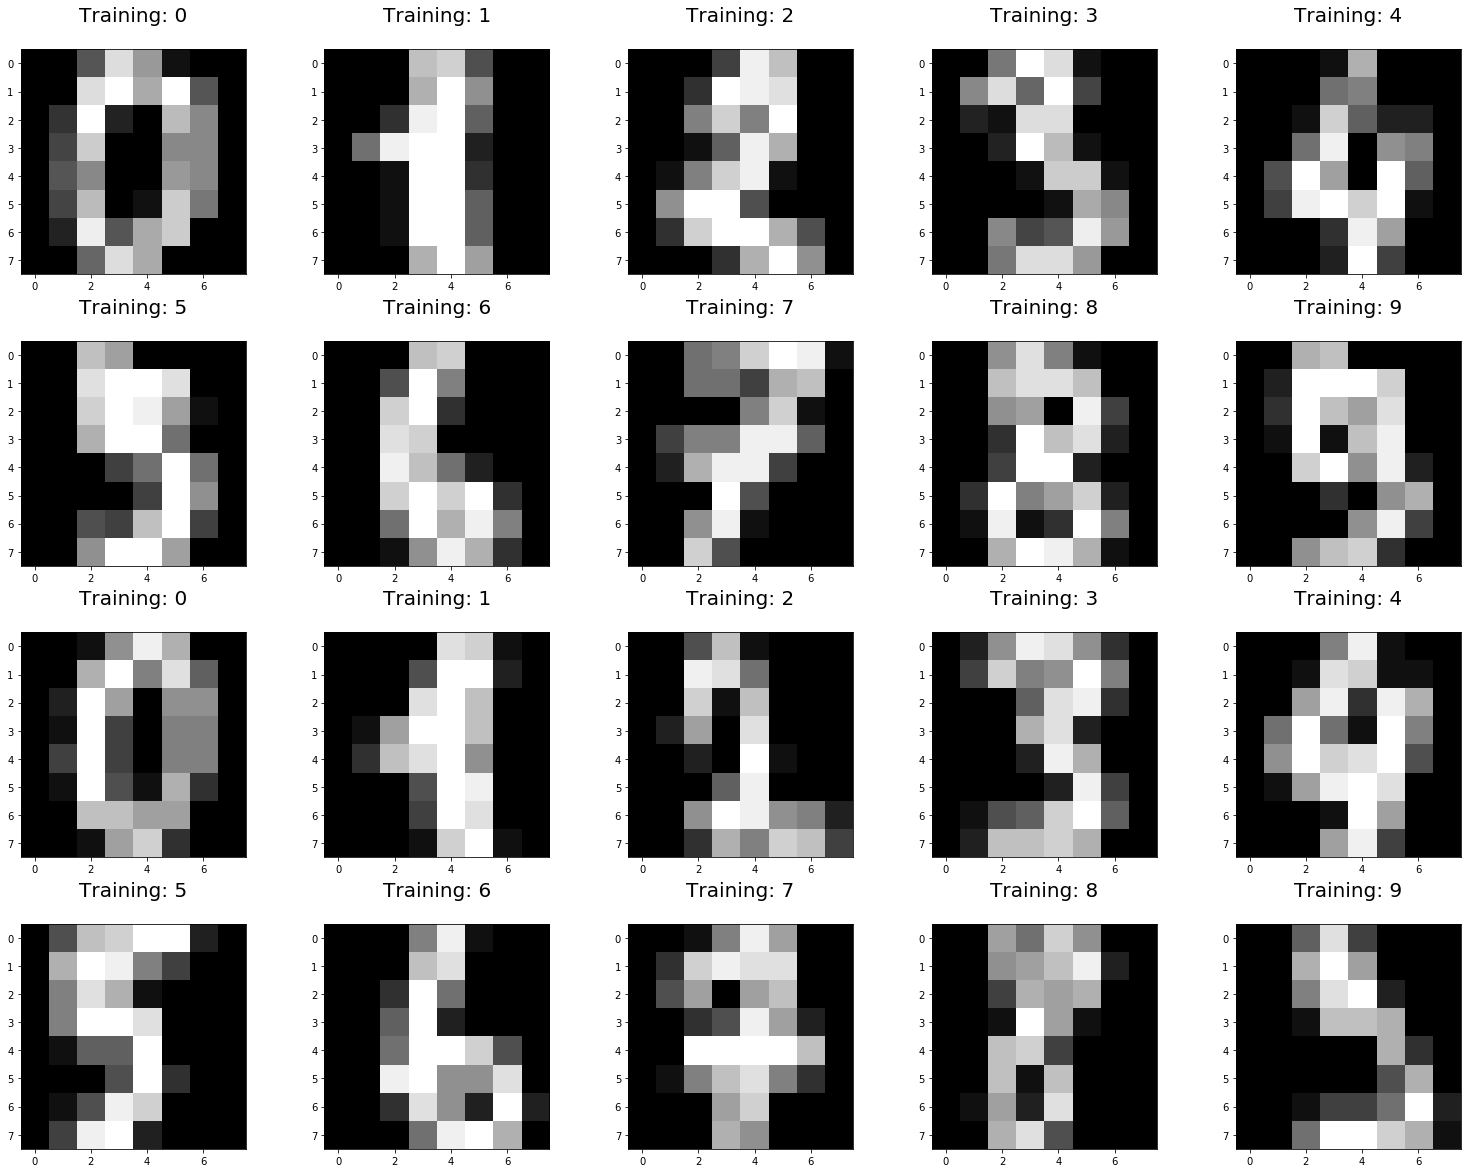

In [4]:
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.35)
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()


### Split the data with y

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state= 99)

print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (1437, 64)
X_test shape =  (360, 64)
y_train shape =  (1437,)
y_test shape =  (360,)


# Scikit-learn implementation. 

In [6]:
ppn = Perceptron(eta0 = 0.001)
ppn.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix  
predictions = ppn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)  
score = accuracy_score(y_test, predictions)
print(score)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 26  2  1  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  1  0  0 26  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  1  0  0  0 40  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  1  2  1  0  0  1  0 27  0]
 [ 0  1  0  0  0  0  0  0  0 29]]
0.961111111111


/Users/Jose/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### The Confusion Matrix

In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(
  y_test, predictions)
print(cm)


[[38  0  0  0  0  0  0  0  0  0]
 [ 0 26  2  1  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  1  0  0 26  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  1  0  0  0 40  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  1  2  1  0  0  1  0 27  0]
 [ 0  1  0  0  0  0  0  0  0 29]]


### Seaborn Library

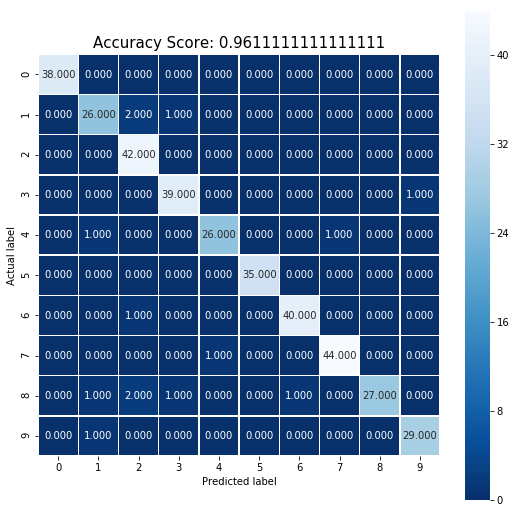

In [8]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

# Own Implementation of a simple Neural Network

### OneHotEncode y

In [9]:
# Panda implementation 
s = pd.Series(y)
y_encode = pd.get_dummies(s)
print('y shape = ', y.shape)
print('y_encoded shape = ',y_encode.shape)

# Conver y_encode into an array, becuase it's currently a DataFrame type
y_encode = np.array(y_encode)

y shape =  (1797,)
y_encoded shape =  (1797, 10)


### Split the data with y_encode

In [10]:
X_train, X_test, y_train_encode, y_test_encode = train_test_split(
    X, y_encode, test_size=0.2, random_state= 99)

print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (1437, 64)
X_test shape =  (360, 64)
y_train shape =  (1437,)
y_test shape =  (360,)


### Activation Functions 

In [105]:
# Activation (sigmoid) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1-sigmoid(z))


# Activation (tanh) function
def tanh(z):
    return np.tanh(z)
    #return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def tanh_prime(z):
    return 1-(tanh(z)**2)


# Activation (ReLu) function
def ReLu(z):
    return z * (z > 0)

def ReLu_prime(z):
    return 1. * (z >= 0)


# Activation (LeakyReLu) function
def LeakyReLu(z):
    #return np.where(z > 0, z, z * 0.01)
    alpha=0.01
    zh=z.copy()
    zl=z.copy()
    zh[z < 0] = 0
    zl[z >= 0] =0
    zl=zl*alpha
    return zh+zl


def LeakyReLu_prime(z):
    alpha=0.01
    dz = np.ones_like(z)
    dz[z < 0] = alpha
    return dz
    '''
    if z<0:
        return 0.01
    else: return 1
    '''     

### Cost Function (Error Formula)

In [12]:
# Cost Function Formula (Error Formula)
def cost_func(A, y):
    return  -np.sum(y*np.log(A) + (1-y)*np.log(1-A))

### Forward and Back Propagation Function

In [13]:
def Propagation(X, y, n_h, n_y, alpha, iterations, act_fun = sigmoid, alpha_fun = None, norm = False):
    if norm == True:
        X = customNormalize(X)
    epoch = int(iterations//20)
    epoch_a = int(iterations//10)
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    np.random.seed(47)
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
 
    for i in range(iterations):
        #Forwardpropagation
        Z1 = np.dot(W1, X) + b1
        A1 = act_fun(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2) #Should always be sigmoid function
        
        if i%epoch == 0:
            #Cost Function
            cost = cost_func(A2, y)
            cost_list[0].append(i)
            cost_list[1].append(cost)
            
        # Backpropagation process
        dZ2 = A2 - y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2)
        
        if act_fun == tanh:
            dZ1 = np.dot(W2.T, dZ2) * tanh_prime(Z1)
        elif act_fun == ReLu:
            dZ1 = np.dot(W2.T, dZ2) * ReLu_prime(Z1)
        elif act_fun == LeakyReLu:
            dZ1 = np.dot(W2.T, dZ2) * LeakyReLu_prime(Z1)
        else:
            dZ1 = np.dot(W2.T, dZ2) * sigmoid_prime(Z1)    

        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1)
        
        if i%epoch_a == 0:
            if alpha_fun == alphaDecay:
                alpha = alphaDecay(alpha,i)
            elif alpha_fun == alphaExpDecay:
                alpha = alphaExpDecay(alpha,i)
            else:
                alpha
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
    return W1, b1, W2, b2, cost_list

### Prediction function

In [14]:
# Use results to predict
def Predict_forward(X, W1, W2, b1, b2, g1 =sigmoid, g2=sigmoid):
    Z1 = np.dot(W1, X) + b1
    A1 = g1(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = g2(Z2)
    #do the prediction and return the output
    return np.argmax(A2,0)

### Additional Functions

In [15]:
def customNormalize(X):
    maxX = X.max(axis=0)
    minX = X.min(axis =0)
    meanX = X.mean(axis=0)
    X = (X-meanX)/(maxX-minX)
    return X

def alphaDecay(alpha, epoch, decay_rate =0.693 ):
    alpha = alpha*(1/(1+decay_rate*epoch))
    return alpha

def alphaExpDecay(alpha,epoch):
    alpha = alpha*0.95**epoch
    return alpha

def GradientDescentAlpha(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alphaExpDecay(alpha,iteration) * gradients
    print('W =','\n',W)
    return W

def GradientDescentAlpha2(X, y, alpha = 0.001, n_iterations = 100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(y)
    W = np.random.randn(X_b.shape[1],1)
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)
        W = W - alphaDecay(alpha,iteration) * gradients
    print('W =','\n',W)
    return W


### Propagation with Sigmoid Function

#### Hyperparameters

In [16]:
n_h = 50
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 10000

#### Training and Test

In [17]:
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, act_fun = sigmoid)
toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

W1= [[-0.84800948  1.29385497  0.87533059 ..., -0.18007256  1.26964413
  -2.57568271]
 [ 0.55768621  2.3890209   0.06302276 ...,  1.34892807  1.0980689
  -1.45334496]
 [-0.01950886 -0.08252981  0.75908812 ...,  1.38862478  0.39258433
  -0.73540031]
 ..., 
 [ 0.80637208 -0.11032727  1.50493926 ...,  0.30320792  0.60423516
   0.40633628]
 [-1.01549681 -0.85019819  0.7202215  ...,  0.0975724  -0.39704288
   1.0338508 ]
 [-1.23533131 -1.07593383  2.56718516 ...,  1.76092797  0.70951195
  -0.69673909]] 

 b1= [[ 0.61350483]
 [-0.86270438]
 [-0.89934062]
 [-0.85212437]
 [-0.88646562]
 [-0.06406837]
 [-0.2174551 ]
 [-1.36468501]
 [ 1.10137276]
 [ 0.89184882]
 [ 0.39655374]
 [ 0.17528798]
 [-0.33598178]
 [-1.27724248]
 [ 0.29314553]
 [-0.89671248]
 [-2.96489121]
 [-0.31717168]
 [-1.23335597]
 [-0.11750866]
 [-0.43781268]
 [ 1.01576393]
 [ 0.21852497]
 [-0.68323188]
 [ 1.54973736]
 [-0.10248432]
 [-0.26625299]
 [-0.49227761]
 [ 1.24796011]
 [ 0.34357303]
 [ 1.09931836]
 [ 0.00614172]
 [ 0.61580

#### Cost Plot

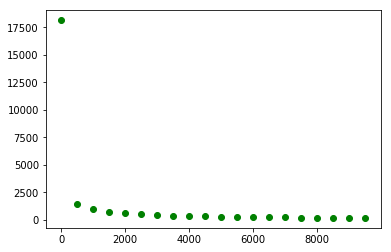

In [18]:
plt.plot(cost_list[0], cost_list[1], 'go')

#### Results

In [19]:
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

Accuracy: 0.969444444444
Processing Time =  77.14304100000001
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       0.91      1.00      0.95        29
          2       0.98      1.00      0.99        42
          3       1.00      0.97      0.99        40
          4       1.00      0.93      0.96        28
          5       0.94      0.97      0.96        35
          6       0.98      0.98      0.98        41
          7       0.94      0.98      0.96        45
          8       1.00      0.91      0.95        32
          9       0.97      0.93      0.95        30

avg / total       0.97      0.97      0.97       360

Confusion Matrix:
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  0  0]
 [ 0  1  0  0 26  0  0  1  0  0]
 [ 0  0  0  0  0 34  0  1  0  0]
 [ 0  1  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 44

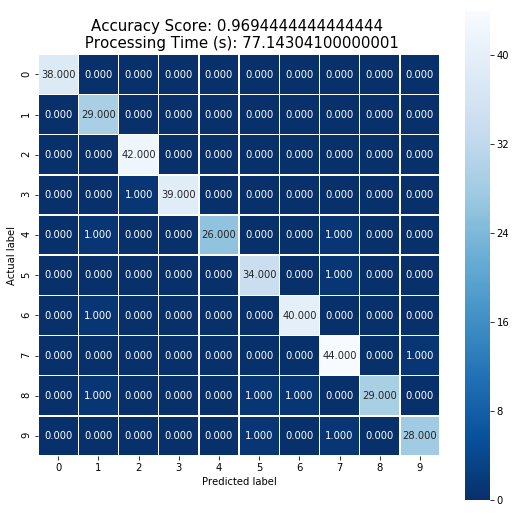

Results from test data


In [20]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Sigmoid Function with 75 Hidden Nodes

W1= [[-0.84800948  1.29734303  0.88933209 ..., -0.18007256  1.26964413
  -2.57568271]
 [ 0.55768621  2.3890209   0.06302276 ...,  1.34892807  1.0980689
  -1.45334496]
 [-0.01950886 -0.0649623   0.79732118 ...,  1.40269036  0.39126803
  -0.70074121]
 ..., 
 [-0.5333397  -0.32375621 -0.08682268 ...,  0.52050877  1.31682894
   0.31260632]
 [ 1.65176353  2.92783386 -0.66597731 ..., -0.20898403  0.46296479
   0.9051908 ]
 [-1.96037652 -0.61802016 -0.23634071 ..., -0.98750951  0.55736569
  -1.32830242]] 

 b1= [[  6.77512789e-02]
 [ -1.40549660e+00]
 [  2.49518785e-01]
 [ -1.08576544e-01]
 [  6.01010026e-01]
 [  1.03853235e+00]
 [ -1.59059595e+00]
 [ -1.10659973e-01]
 [  7.21247020e-01]
 [  3.82970358e-01]
 [ -1.53125048e+00]
 [  2.65566361e-01]
 [ -2.77838924e-01]
 [  2.98637213e-01]
 [  8.54959916e-01]
 [  6.50976897e-01]
 [  3.29774591e-01]
 [ -1.05597094e+00]
 [  4.67320972e-04]
 [ -2.56582297e-01]
 [  1.40639172e-01]
 [  8.32044994e-02]
 [ -1.11421226e-01]
 [  1.89306745e-01]
 [ -3.2023

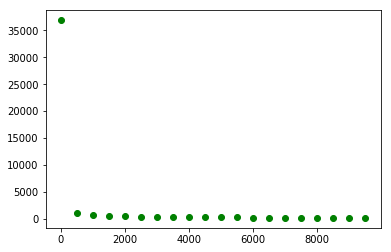

In [21]:
#Hyperparameters 
n_h = 75
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 10000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = sigmoid, alpha_fun = None, norm = False)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

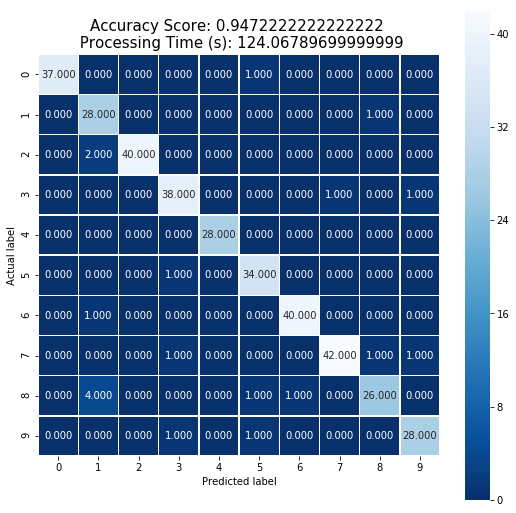

Results from test data


In [22]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Sigmoid Function with 100 Hidden Nodes

W1= [[-0.84800948  1.30110581  0.90572372 ..., -0.18007256  1.26964413
  -2.57568271]
 [ 0.55768621  2.3890209   0.06302276 ...,  1.34892807  1.0980689
  -1.45334496]
 [-0.01950886 -0.07359382  0.83291217 ...,  1.3569384   0.34087534
  -0.74097221]
 ..., 
 [-1.9804391   0.13128368 -1.09296963 ..., -0.68895767  0.16212584
  -2.34606741]
 [ 1.63147176 -1.77757241  1.84653164 ..., -1.83731057  0.43336429
  -0.34857346]
 [ 0.75992635  1.25331073 -0.19204113 ...,  1.28551586  0.04473832
   0.09427148]] 

 b1= [[-0.93662221]
 [-0.8793909 ]
 [-1.1056796 ]
 [ 1.52709471]
 [-0.41940429]
 [-0.20136227]
 [ 0.82598358]
 [ 1.09821225]
 [-2.05992896]
 [-0.03383098]
 [-0.60013889]
 [-0.46924669]
 [-2.08385637]
 [-0.9501116 ]
 [-2.08534435]
 [-0.55689551]
 [-0.02444897]
 [ 0.25909146]
 [-0.76361786]
 [ 0.46222538]
 [ 1.12511307]
 [ 1.38185489]
 [ 0.73478881]
 [-1.03754225]
 [-1.73231054]
 [-0.76002017]
 [ 1.60436613]
 [-0.20950126]
 [-1.12876507]
 [-0.20125329]
 [ 0.26451829]
 [ 2.26169258]
 [-0.16590

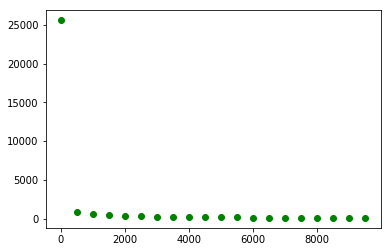

In [23]:
#Hyperparameters 
n_h = 100
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 10000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = sigmoid, alpha_fun = None, norm = False)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

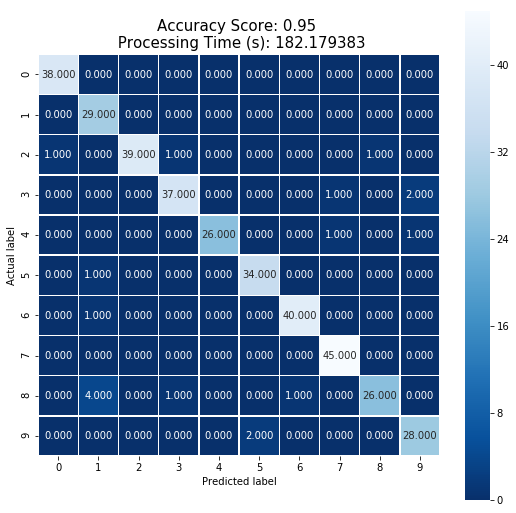

Results from test data


In [24]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Sigmoid Function with 25 Hidden Nodes

W1= [[-0.84800948  1.3007318   0.96238717 ..., -0.18007256  1.26964413
  -2.57568271]
 [ 0.55768621  2.3890209   0.06302276 ...,  1.34892807  1.0980689
  -1.45334496]
 [-0.01950886 -0.11337061  0.87387043 ...,  0.85133588  0.95331187
  -0.20152723]
 ..., 
 [ 0.06438905  1.41255414 -1.44616417 ...,  0.64245233 -0.15604787
   0.02575447]
 [ 0.83049925  0.20639352 -1.57695786 ..., -1.66572087 -0.56861225
  -0.26902434]
 [ 0.34457775  1.29759883  1.16928829 ...,  1.73821902 -1.87511168
   0.30058253]] 

 b1= [[ 0.60712175]
 [ 0.52449864]
 [ 0.6906672 ]
 [-2.20038405]
 [-0.83067458]
 [-0.98899498]
 [ 0.71893699]
 [-0.57933179]
 [ 0.30214021]
 [-0.35997188]
 [-1.66874123]
 [-0.19591794]
 [-1.67382125]
 [-1.27752012]
 [-1.00477314]
 [-0.5774204 ]
 [ 1.09634628]
 [-0.93505309]
 [ 0.60867976]
 [ 1.68668464]
 [-0.37275003]
 [ 1.52268435]
 [ 0.13090203]
 [ 0.64230042]
 [-0.97966433]] 

 W2= [[ 1.89198955  0.28849696 -1.63707559 -1.34842796 -2.20819379 -1.48777268
  -4.48446945 -0.27377297 -0.2995

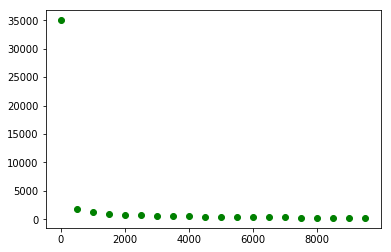

In [25]:
#Hyperparameters 
n_h = 25
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 10000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = sigmoid, alpha_fun = None, norm = False)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

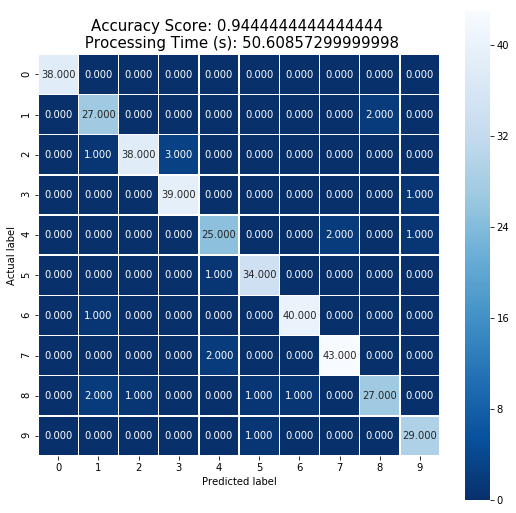

Results from test data


In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Sigmoid Function with 200 Hidden Nodes

/Users/Jose/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/Jose/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


W1= [[-0.84800948  1.31710223  0.97121197 ..., -0.18007256  1.26964413
  -2.57568271]
 [ 0.55768621  2.3890209   0.06302276 ...,  1.34892807  1.0980689
  -1.45334496]
 [-0.01950886 -0.06319278  0.84899673 ...,  1.17075001  0.46291488
  -0.65797633]
 ..., 
 [-1.02694867 -0.63438047 -0.31212876 ..., -0.73113483 -0.74694045
  -1.46045414]
 [ 0.72898303  1.23638687 -0.41737617 ...,  0.80140366  1.14549303
   2.00175533]
 [-1.2375093  -0.85578674 -0.15478171 ...,  0.4643407  -0.46248363
   1.18088499]] 

 b1= [[ 0.671007  ]
 [ 1.35962246]
 [ 1.97932652]
 [ 1.7684864 ]
 [ 0.92671165]
 [-0.26909729]
 [ 0.79203539]
 [ 2.83423311]
 [ 0.2020896 ]
 [ 0.04943098]
 [ 1.33780068]
 [ 0.02203809]
 [-0.59234831]
 [-0.88126265]
 [-0.34055133]
 [-0.17916723]
 [ 0.41941412]
 [ 0.44069666]
 [-2.57479141]
 [ 0.20773565]
 [-2.05177206]
 [ 0.02166252]
 [-0.82885781]
 [-1.22690696]
 [-0.17051723]
 [ 0.87688642]
 [ 2.20542096]
 [-1.8900968 ]
 [ 0.93475279]
 [-1.56585828]
 [ 0.93208217]
 [ 0.71449502]
 [ 1.16781

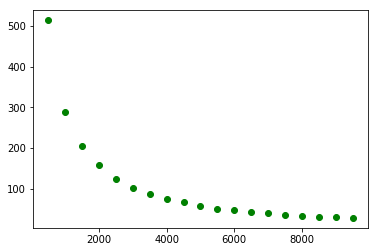

In [27]:
#Hyperparameters 
n_h = 200
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 10000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = sigmoid, alpha_fun = None, norm = False)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))



#### Results

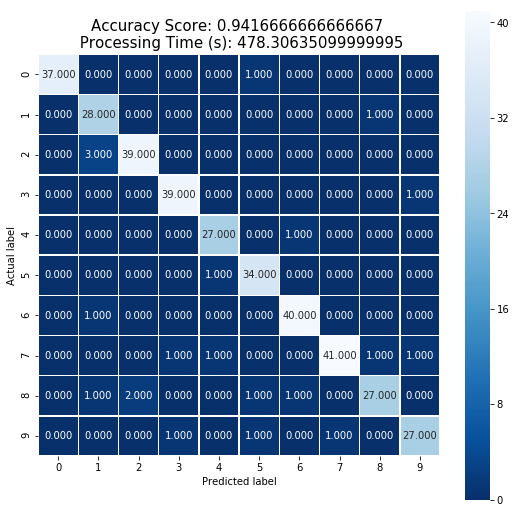

Results from test data


In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Sigmoid Function with 150 Hidden Nodes

W1= [[-0.84800948  1.3116813   0.95221609 ..., -0.18007256  1.26964413
  -2.57568271]
 [ 0.55768621  2.3890209   0.06302276 ...,  1.34892807  1.0980689
  -1.45334496]
 [-0.01950886 -0.0837355   0.71823145 ...,  1.3006057   0.33107843
  -0.67307722]
 ..., 
 [-1.86736994  0.18669862 -1.71092136 ...,  1.66526415  1.07858014
   0.48466593]
 [-1.12910478 -0.94553879 -0.23336754 ...,  0.63587842  0.03755407
   0.4518648 ]
 [-1.1902594  -1.47304896 -1.25481014 ..., -0.0309783  -1.55193894
   1.51362763]] 

 b1= [[ 1.15335013]
 [ 1.29822897]
 [ 4.01510939]
 [-1.55364784]
 [ 1.22540704]
 [ 1.85853348]
 [ 0.76510752]
 [-0.11352897]
 [-1.08402036]
 [ 0.36803244]
 [ 1.66529901]
 [ 0.01223573]
 [ 0.68526848]
 [ 0.46698578]
 [ 1.12803213]
 [ 1.74532116]
 [-0.32757023]
 [ 0.95738687]
 [ 0.23528399]
 [-1.24204133]
 [ 0.18121881]
 [ 0.65058584]
 [ 0.27417981]
 [ 1.67608098]
 [ 0.400076  ]
 [ 2.3621179 ]
 [ 0.46841673]
 [-0.19313261]
 [ 0.10925684]
 [ 0.5437839 ]
 [-0.27915997]
 [ 0.14903772]
 [-0.25300

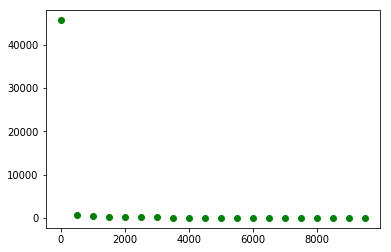

In [29]:
#Hyperparameters 
n_h = 150
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 10000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = sigmoid, alpha_fun = None, norm = False)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

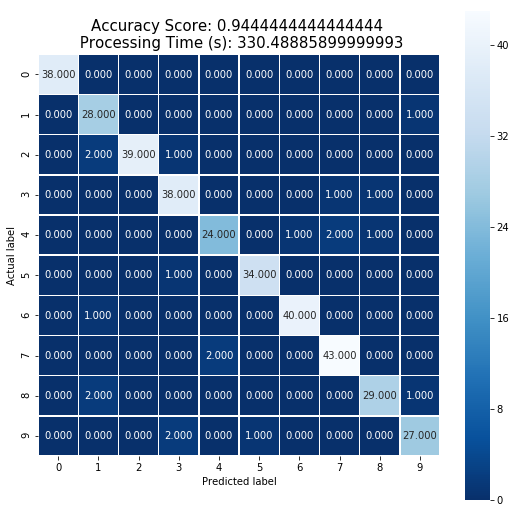

Results from test data


In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Tanh Function

W1= [[-0.98656575  1.19075672  0.81585479 ...,  0.49069822  1.33657708
  -2.74170534]
 [ 0.57209393  2.38874764  0.05981226 ...,  1.28980589  0.8597013  -1.543325  ]
 [-0.04614759 -0.09071713  0.89277217 ...,  1.11969071  0.27654874
  -0.73978651]
 ..., 
 [-1.94708473  0.2046604  -0.9770433  ..., -0.61238334  0.11557094
  -2.28555026]
 [ 1.75554078 -1.6495659   2.00106104 ..., -1.7147409   0.58833932
  -0.27374042]
 [ 0.88098307  1.37617201  0.07765618 ...,  0.76628159  0.16044781
   0.1833867 ]] 

 b1= [[-0.36680855]
 [-0.30957724]
 [-0.53586594]
 [ 2.09690838]
 [ 0.15040937]
 [ 0.36845139]
 [ 1.39579724]
 [ 1.66802591]
 [-1.49011529]
 [ 0.53598268]
 [-0.03032523]
 [ 0.10056697]
 [-1.51404271]
 [-0.38029793]
 [-1.51553069]
 [ 0.01291815]
 [ 0.54536469]
 [ 0.82890512]
 [-0.1938042 ]
 [ 1.03203904]
 [ 1.69492673]
 [ 1.95166855]
 [ 1.30460247]
 [-0.46772859]
 [-1.16249688]
 [-0.19020651]
 [ 2.17417979]
 [ 0.3603124 ]
 [-0.55895141]
 [ 0.36856037]
 [ 0.83433196]
 [ 2.83150624]
 [ 0.403908

/Users/Jose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


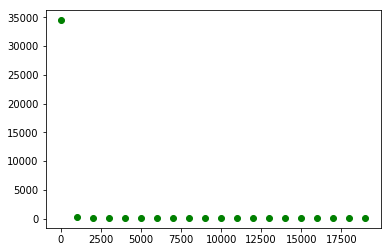

In [113]:
#Hyperparameters 
n_h = 100
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 20000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = tanh, alpha_fun = alphaDecay, norm = True)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

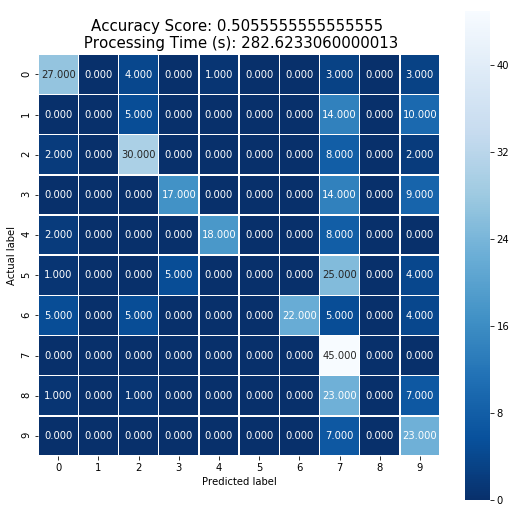

Results from test data


In [114]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with ReLu Function

/Users/Jose/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/Jose/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


W1= [[-0.83379993  1.32467767  0.96371517 ..., -0.15367876  1.2869564
  -2.56141427]
 [ 0.52355746  2.38955542  0.29856973 ...,  1.09122571  0.90746779
  -1.49597519]
 [ 0.0259697  -0.01896939  0.87935374 ...,  1.15888741  0.41056255
  -0.66222337]
 ..., 
 [-0.93019042 -0.54496771 -0.40942439 ..., -0.62681791 -0.63922186
  -1.32172649]
 [ 0.69238548  1.19766184 -0.59171434 ...,  0.83359247  1.09079328
   1.91812505]
 [-1.21152161 -0.82966287 -0.16407382 ...,  0.53578947 -0.33818334
   1.25533385]] 

 b1= [[-2.67301583]
 [-1.98440036]
 [-1.36469631]
 [-1.57553643]
 [-2.41731117]
 [-3.61312012]
 [-2.55198744]
 [-0.50978971]
 [-3.14193323]
 [-3.29459185]
 [-2.00622214]
 [-3.32198473]
 [-3.93637113]
 [-4.22528547]
 [-3.68457415]
 [-3.52319005]
 [-2.92460871]
 [-2.90332617]
 [-5.91881424]
 [-3.13628717]
 [-5.39579489]
 [-3.3223603 ]
 [-4.17288063]
 [-4.57092979]
 [-3.51454005]
 [-2.4671364 ]
 [-1.13860187]
 [-5.23411962]
 [-2.40927003]
 [-4.90988111]
 [-2.41194065]
 [-2.6295278 ]
 [-2.17621

/Users/Jose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


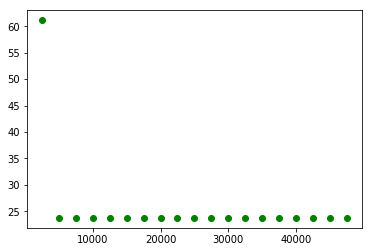

In [111]:
#Hyperparameters 
n_h = 200
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 50000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = ReLu, alpha_fun = alphaDecay, norm = True)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

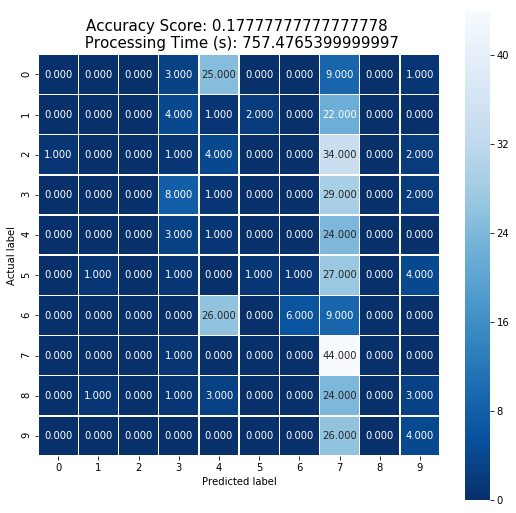

Results from test data


In [112]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Leaky ReLu Function

/Users/Jose/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


W1= [[ -8.14255715e-01   1.31321478e+00   8.48200675e-01 ...,  -1.33951495e-01
    1.30866823e+00  -2.54183917e+00]
 [  5.23542482e-01   2.29139818e+00  -2.31583273e-02 ...,   1.81106792e+00
    1.23547888e+00  -1.49389879e+00]
 [ -2.18299347e-04  -4.50672039e-02   8.57551178e-01 ...,   1.23052384e+00
    3.74704836e-01  -6.88807516e-01]
 ..., 
 [ -2.04131317e+00   5.11543497e-02  -1.49096537e+00 ...,  -6.82695017e-01
   -8.27607405e-02  -2.41850077e+00]
 [  1.63978247e+00  -1.77870311e+00   1.79939848e+00 ...,  -1.72712367e+00
    6.32763568e-01  -3.64677415e-01]
 [  7.52909692e-01   1.24714174e+00  -1.14762636e-01 ...,   1.28825936e+00
    2.45548043e-01   8.47671105e-02]] 

 b1= [[-2.82741702]
 [-2.77018571]
 [-2.99647441]
 [-0.3637001 ]
 [-2.3101991 ]
 [-2.09215709]
 [-1.06481124]
 [-0.79258257]
 [-3.95072377]
 [-1.9246258 ]
 [-2.4909337 ]
 [-2.36004151]
 [-3.97465118]
 [-2.84090641]
 [-3.97613917]
 [-2.44769032]
 [-1.91524379]
 [-1.63170336]
 [-2.65441268]
 [-1.42856943]
 [-0.7656

/Users/Jose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


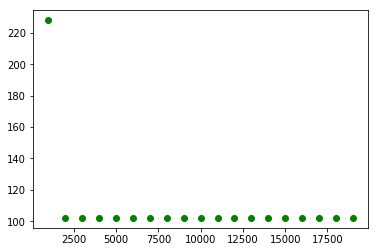

In [109]:
#Hyperparameters 
n_h = 100
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.1
iterations = 20000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = LeakyReLu, alpha_fun = alphaDecay, norm = True)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

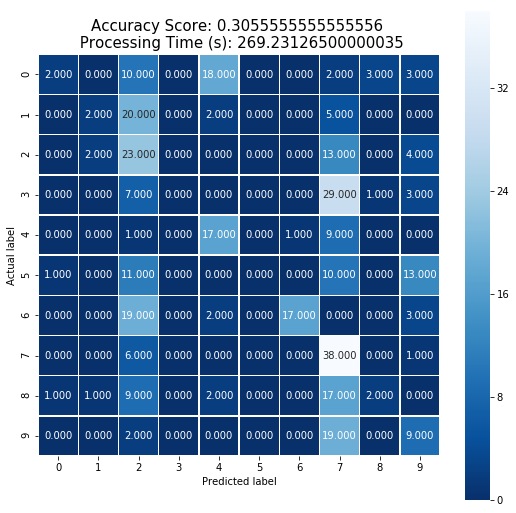

Results from test data


In [110]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Sigmoid Function with Normalization

W1= [[-0.69286729  1.41947719  0.71580243 ..., -0.12429252  1.40539812
  -2.42131792]
 [ 0.6747466   2.45084401 -0.48024635 ...,  1.41723594  1.11689544
  -1.34389917]
 [ 0.01224557 -0.03506827  0.87190718 ...,  1.33505014  0.34093291
  -0.67669981]
 ..., 
 [ 0.89075523 -0.03113531  1.46658247 ...,  0.02185203  0.41228765
   0.4592509 ]
 [-1.13767925 -0.97471169  0.83424655 ..., -0.04053288 -0.44109333
   0.84549705]
 [-1.25695458 -1.08497688  2.52368013 ...,  1.9968753   0.7938485
  -0.72026847]] 

 b1= [[-0.02114176]
 [-1.49735096]
 [-1.53398721]
 [-1.48677095]
 [-1.5211122 ]
 [-0.69871495]
 [-0.85210168]
 [-1.99933159]
 [ 0.46672618]
 [ 0.25720224]
 [-0.23809284]
 [-0.45935861]
 [-0.97062836]
 [-1.91188906]
 [-0.34150105]
 [-1.53135906]
 [-3.59953779]
 [-0.95181826]
 [-1.86800255]
 [-0.75215525]
 [-1.07245926]
 [ 0.38111735]
 [-0.41612161]
 [-1.31787846]
 [ 0.91509078]
 [-0.7371309 ]
 [-0.90089958]
 [-1.12692419]
 [ 0.61331353]
 [-0.29107356]
 [ 0.46467177]
 [-0.62850487]
 [-0.01884

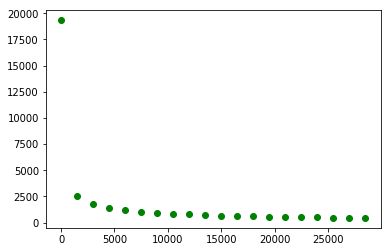

In [115]:
#Hyperparameters 
n_h = 50
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.01
iterations = 30000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, 
                                        act_fun = sigmoid, alpha_fun = None, norm = True)

toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

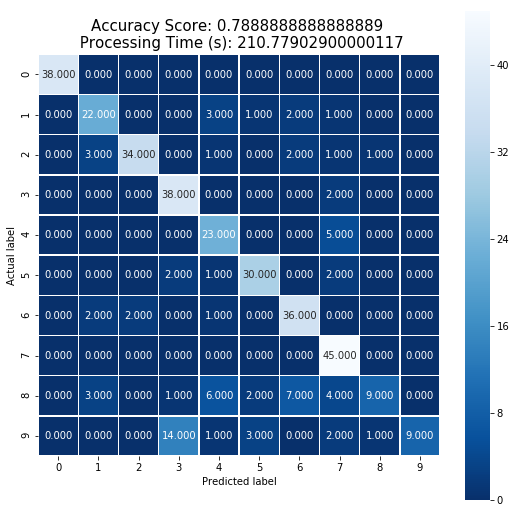

Results from test data


In [116]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')

### Propagation with Sigmoid Function with Alpha Decay

W1= [[-0.84800948  1.30515028  0.92069383 ..., -0.18007256  1.26964413
  -2.57568271]
 [ 0.55768621  2.3890209   0.06302276 ...,  1.34892807  1.0980689
  -1.45334496]
 [-0.01950886 -0.0646329   0.83427187 ...,  1.26352605  0.35961679
  -0.71451871]
 ..., 
 [ 0.80637208 -0.08605968  1.51291725 ...,  0.36102649  0.60639469
   0.40633628]
 [-1.01549681 -0.85734843  0.92132394 ...,  0.16470407 -0.32808741
   1.02315524]
 [-1.23533131 -1.06444582  2.52592955 ...,  1.77552684  0.65619498
  -0.73098562]] 

 b1= [[ 0.61833409]
 [-0.85787512]
 [-0.89451137]
 [-0.84729511]
 [-0.88163636]
 [-0.05923911]
 [-0.21262584]
 [-1.35985575]
 [ 1.10620202]
 [ 0.89667808]
 [ 0.401383  ]
 [ 0.18011724]
 [-0.33115252]
 [-1.27241322]
 [ 0.29797479]
 [-0.89188322]
 [-2.96006195]
 [-0.31234242]
 [-1.22852671]
 [-0.1126794 ]
 [-0.43298342]
 [ 1.02059319]
 [ 0.22335423]
 [-0.67840262]
 [ 1.55456662]
 [-0.09765506]
 [-0.26142374]
 [-0.48744835]
 [ 1.25278937]
 [ 0.34840228]
 [ 1.10414762]
 [ 0.01097098]
 [ 0.62063

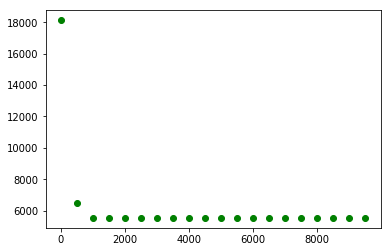

In [117]:
#Hyperparameters 
n_h = 50
n_y = 10 # Must not be alter for this example becuase we have 10 different y outputs {0,1,2,...,9}
alpha = 0.002
iterations = 10000

# Training and Test
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, y_train_encode.T, n_h, n_y, alpha, iterations, act_fun = sigmoid, alpha_fun = alphaDecay)
toc = time.clock()
print('W1=',W1, '\n\n', 'b1=',b1, '\n\n', 'W2=',W2, '\n\n', 'b2=',b2)
ProcessTime = toc-tic
# Prediction to compare results
prediction = Predict_forward(X_test.T, W1, W2, b1, b2, sigmoid, sigmoid)

# Cost Plot
plt.plot(cost_list[0], cost_list[1], 'go')

# Results
AccuracyResult = accuracy_score(y_test, prediction)
print('Accuracy:', AccuracyResult)
print('Processing Time = ', ProcessTime)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))

#### Results

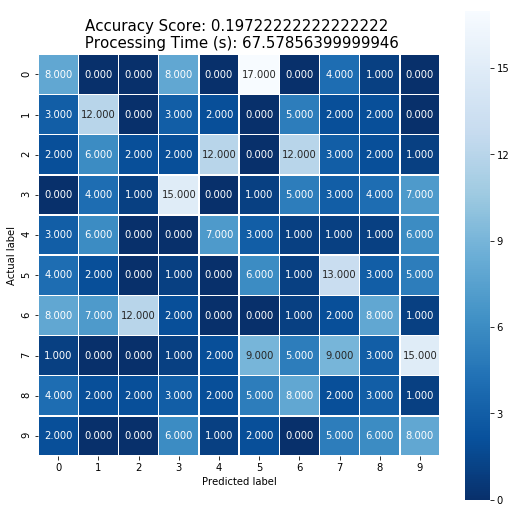

Results from test data


In [118]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {} \n Processing Time (s): {}'.format(AccuracyResult,ProcessTime )
plt.title(all_sample_title, size = 15);
plt.show()
print('Results from test data')